In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
import pylab as pl

from scipy.stats import norm

In [2]:
data = pd.read_csv('/home/theresa/Desktop/DataSets/UnitedTweets/UALQuotesEpoch.txt')

dateTimes = [datetime.fromtimestamp(value) for value in data['EpochTime'].values]

data.index = dateTimes

In [3]:
openingTimes = []
for i in range(len(data.index)) :
    if data['DATE'][i][0]=='a' :
        openingTimes.append(data.index[i])

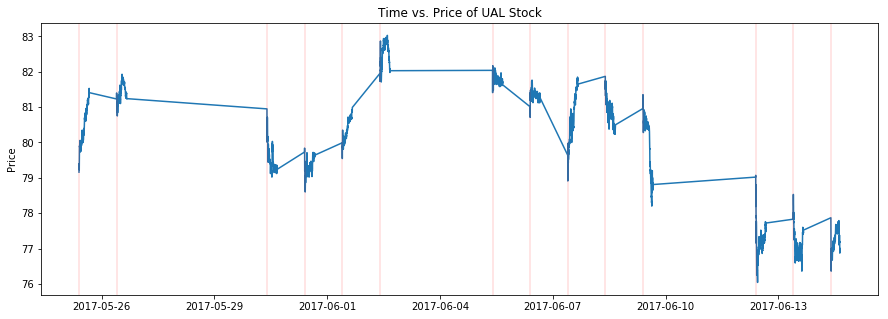

In [4]:
plt.figure(figsize=(15,5))

plt.plot(data.index,data['CLOSE'])
for x in openingTimes :
    plt.axvline(x, linewidth = .2, color='red')
plt.ylabel('Price')
plt.title('Time vs. Price of UAL Stock');

plt.savefig('UALLineGraph.png')
plt.show()
#the linear pieces occur when the NYSE is closed because the plot 'connects the dots'

In [5]:
#This function will difference the given column of a data frame, returning a new dataframe
def difference(dataSet, nameOfColumn ,difference) :
    #dataSet should be dataFrame
    #nameOfColumn should be string name of column you wish to difference
    #difference should be the lag in the difference. difference=1 means subtracting one
    #entry from the next to form the entry in the returned dataframe's column
    differences = pd.DataFrame()
    diffList = []
    indexList = []
    length = len(dataSet[nameOfColumn])
    for i in range(difference, length) :
        diff = dataSet[nameOfColumn][i]-dataSet[nameOfColumn][i - difference]
        index = dataSet.index[i]
        diffList.append(diff)
        indexList.append(index)
   
    differences[nameOfColumn]=diffList
    differences.index = indexList
    return differences
        
        
    

In [6]:
differences=difference(data,"CLOSE",1)

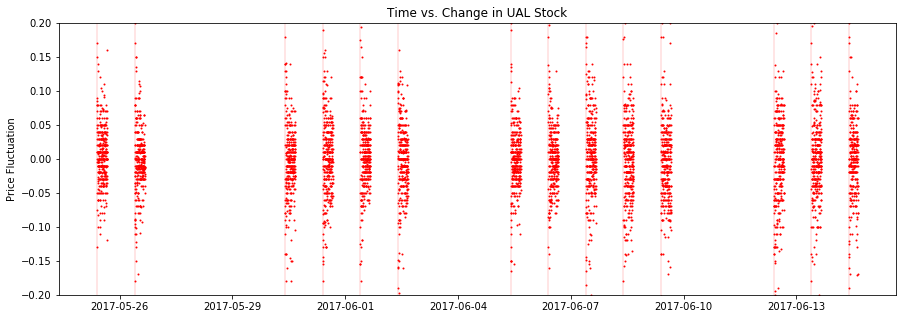

In [7]:
plt.figure(figsize=(15,5))
plt.axis(ymin=-0.2,ymax=.2)
plt.plot(differences.index,differences['CLOSE'],'ro', ms=1)
for x in openingTimes :
    plt.axvline(x, linewidth = .2, color='red')
plt.ylabel('Price Fluctuation')
plt.title('Time vs. Change in UAL Stock');
#plt.savefig('UAL_DifferenceOverTime.png')
plt.show()
#shows first differences

In [8]:
std = np.std(differences['CLOSE']) 
mean = np.mean(differences['CLOSE'])  

std, mean


(0.0684492085934769, -0.00040014820303816166)

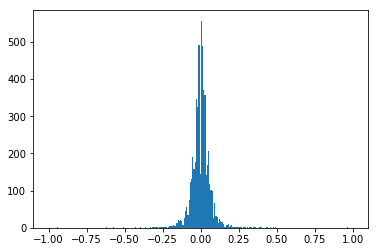

In [9]:
#I was curious to see what the distribution of differences looked like

pl.hist(differences["CLOSE"],normed=False, bins=250, range=(-1,1))      #use this to draw histogram of your data
#plt.savefig('UAL DifferenceDistribution.png')
plt.show()
 

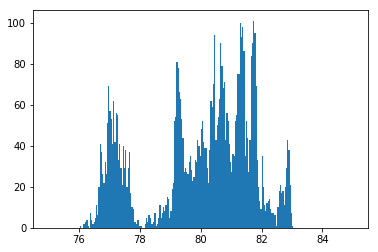

In [10]:
#What about the distribution of our original stock prices? 

pl.hist(data["CLOSE"],normed=False, bins=250, range=(75,85) )     #use this to draw histogram of your data
#plt.savefig('UAL_QuoteDistribution.png')
plt.show()  